# 0.Import Libraries

In [22]:
# linear algebra
import numpy as np 
np.random.seed(123)
import math

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# we will create data with make_blobs
from sklearn import datasets


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 1.Create Data

In [178]:
X, y = datasets.make_blobs(n_samples=100,n_features=2,centers=2,center_box=(-2,2),cluster_std=0.5,random_state=True)

<Axes: >

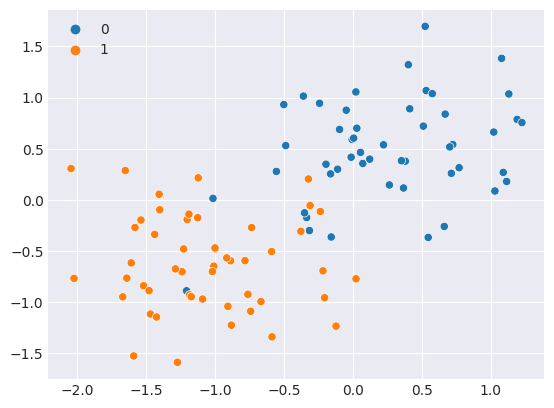

In [179]:
sns.scatterplot(x = X.T[0], y = X.T[1], hue=y)

# 2.Helper Functions

Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [183]:
def sigmoid(x):
    result = 1 / (1 + np.exp(-x))
    return result

def output_formula(X, W, b):
    result = sigmoid( np.matmul(X, W) + b )
    return result

def error_formula(y, y_hat):
    result = (- y * np.log(y_hat)) - ((1-y) * np.log(1 - y_hat))
    return result

def update_weights(X, y, W, b, learn_rate):
    y_hat = prediction(X, W, b)
    d_error = y - y_hat
    W += d_error * learn_rate * X
    b += d_error * learn_rate
    return W, b

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-2.5, 1.5)
    plt.ylim(-2, 2)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

# 3.Training Function

> This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [184]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    last_loss = None
    
    n_records, n_features = features.shape
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    
    for e in range(epochs):
        
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        
        errors.append(loss)
        
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            
            last_loss = loss
            
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            
            print("Accuracy: ", accuracy)
            
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])

            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    sns.scatterplot(x = features.T[0], y = features.T[1], hue=targets)
    plt.show()
    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.6417720488325256
Accuracy:  0.61

========== Epoch 10 ==========
Train loss:  0.27767543012392215
Accuracy:  0.91

========== Epoch 20 ==========
Train loss:  0.22467664114493682
Accuracy:  0.91

========== Epoch 30 ==========
Train loss:  0.20456701907219357
Accuracy:  0.92

========== Epoch 40 ==========
Train loss:  0.1943789869596873
Accuracy:  0.93

========== Epoch 50 ==========
Train loss:  0.18841445996464773
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.1846048023779794
Accuracy:  0.94

========== Epoch 70 ==========
Train loss:  0.18202586278621977
Accuracy:  0.94

========== Epoch 80 ==========
Train loss:  0.1802061544551108
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.17888176208156523
Accuracy:  0.94


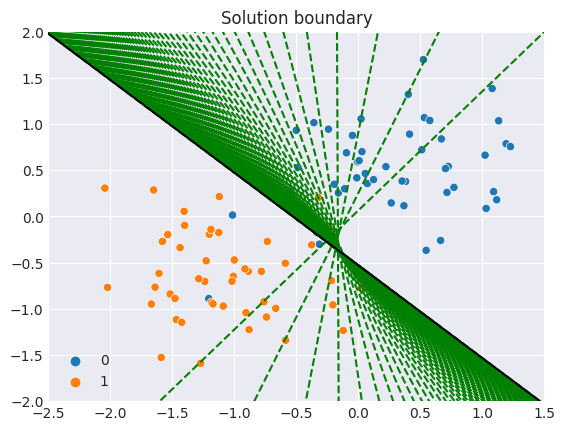

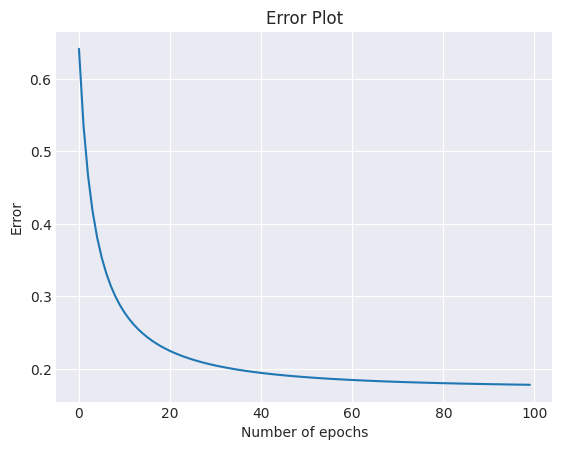

In [185]:
train(X, y, epochs=100, learnrate=0.01, graph_lines=True)